In [ ]:
# https://data.opendatasoft.com/explore/dataset/georef-australia-state%40public/export/?disjunctive.ste_code&disjunctive.ste_name
# credits OpenDataSoft

In [1]:
import os
import json
from random import sample

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import cnames

In [10]:
hordeum_australia = pd.read_csv(r"./data/hordeum-2025-05-07/hordeum-2025-05-07.csv", low_memory=False)
cyperus_australia = pd.read_csv(r"./data/cyperus-2025-05-07/cyperus-2025-05-07.csv", low_memory=False)
fred = pd.read_csv(r"./data/FRED/FRED3_Entire_Database_2021.csv", low_memory=False, header=0, skiprows=range(1, 10))
# australia = pd.read_csv(r"./data/georef-australia-state@public.csv", low_memory=False, sep=';')
# with open(r"./data/georef-australia-state@public.json", mode='r') as fp:
#     ausgeo = json.load(fp=fp)

In [3]:
with open(file=r"./data/australia-borders-coordinates.npy", mode="rb") as fp:
    COORDINATES_AUSTRALIA = np.load(file=fp, allow_pickle=False)

with open(file=r"./data/nsw-borders-coordinates.npy", mode="rb") as fp:
    COORDINATES_NSW = np.load(file=fp, allow_pickle=False)   

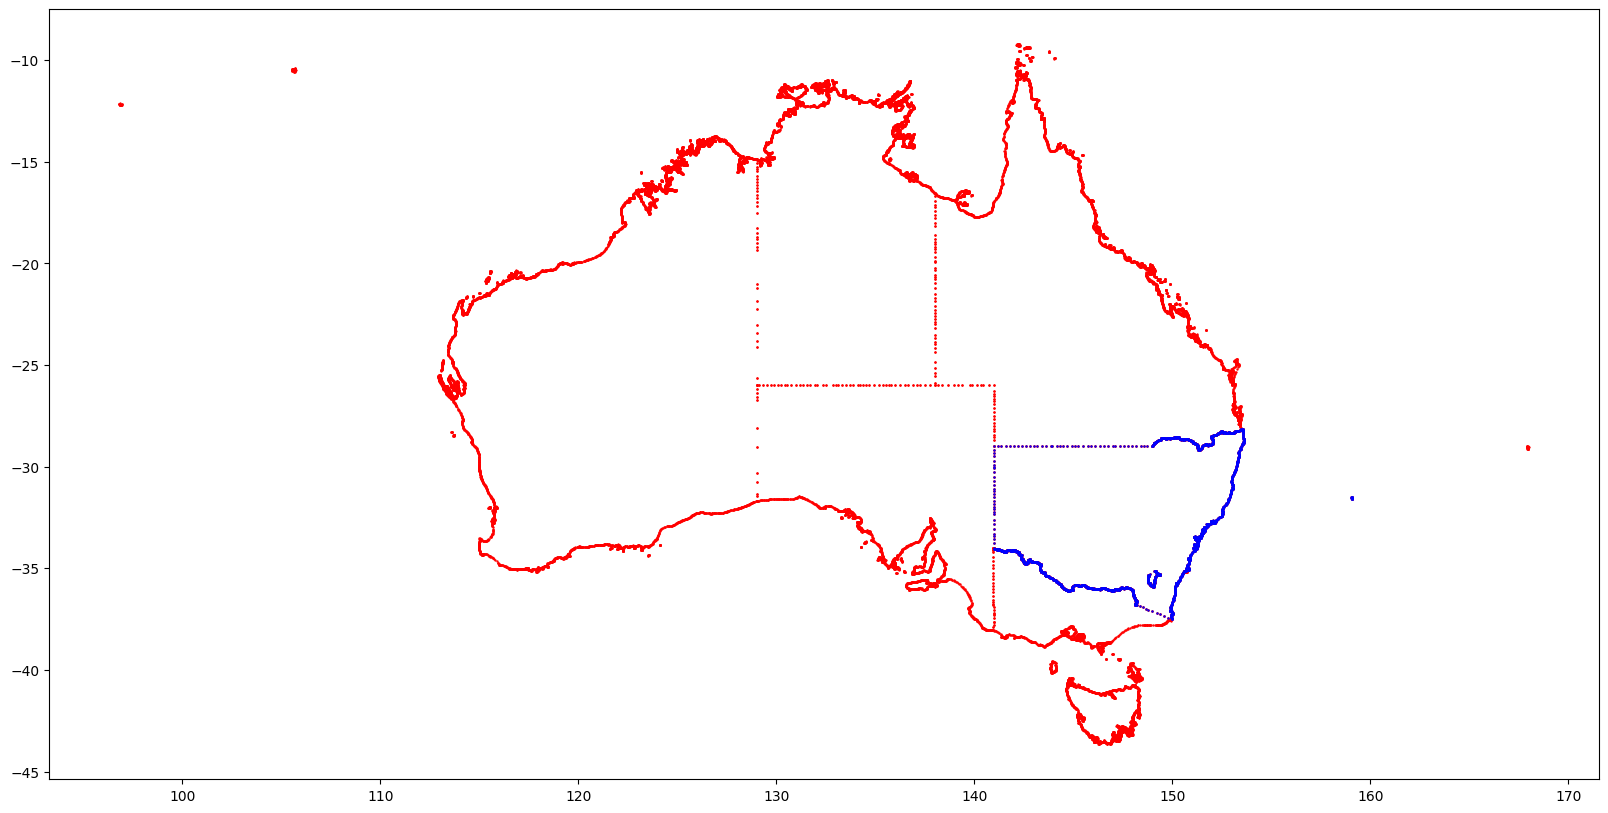

In [15]:
# that was so fucking FAST!!!

fig, axes = plt.subplots()
fig.set_size_inches(20 ,10)
axes.scatter(COORDINATES_AUSTRALIA[:, 0], COORDINATES_AUSTRALIA[:, 1], s=0.5, color="red")
axes.scatter(COORDINATES_NSW[:, 0], COORDINATES_NSW[:, 1], s=0.5, color="blue")
plt.show()

In [16]:
os.listdir(r"./data/hordeum-2025-05-07/")

['citation.csv',
 'doi.txt',
 'headings.csv',
 'hordeum-2025-05-07.csv',
 'README.html']

In [17]:
with pd.option_context("display.max_rows", None):
    # print(pd.read_csv(r"./data/hordeum-2025-05-07/headings.csv").loc[:, ["Column name", "Field description"]])
    pass

In [18]:
# life stage
# Family  
# Genus  
# Subgenus  
# Specific Epithet
# Latitude  
# Longitude  
# Datum

In [19]:
hordeum_australia.columns[hordeum_australia.columns.str.contains("itude")]

Index(['decimalLatitude', 'decimalLongitude', 'verbatimLatitude',
       'verbatimLongitude'],
      dtype='object')

In [20]:
# we don't want these
hordeum_australia.query("decimalLatitude>-10")

,dataResourceUid,images,dcterms:modified,dcterms:language,dcterms:license,rightsHolder,dcterms:accessRights,dcterms:bibliographicCitation,references,institutionID,...,source,measurementID,measurementType,measurementUnit,measurementDeterminedBy,measurementAccuracy,degreeOfEstablishment,relatedResourceID,images.1,dcterms:type
2119,dr26650,NaN,2017-05-16,en,CC-BY 4.0 (Int),NaN,NaN,NaN,http://www.aucklandmuseum.com/discover/collect...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PhysicalObject
2120,dr26650,NaN,2017-09-07,en,CC-BY 4.0 (Int),NaN,NaN,NaN,http://www.aucklandmuseum.com/discover/collect...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PhysicalObject


In [22]:
hordeum_tidied =  hordeum_australia.loc[:, ["country", "stateProvince", "day", "month", "year",
                         "genus", "specificEpithet", "decimalLatitude", "decimalLongitude"]].\
                            dropna(subset=["specificEpithet", "decimalLatitude", "decimalLongitude"]).\
                                query("decimalLatitude<-10 & specificEpithet!=\"sp.\"")

In [23]:
hordeum_tidied

,country,stateProvince,day,month,year,genus,specificEpithet,decimalLatitude,decimalLongitude
0,Australia,South Australia,16.0,12.0,1976.0,Hordeum,marinum,-35.050000,139.116667
1,Australia,Victoria,20.0,9.0,1978.0,Hordeum,glaucum,-35.850000,145.433333
2,Australia,Tasmania,NaN,6.0,1928.0,Hordeum,aegiceras,-42.883333,147.316667
3,Australia,Tasmania,1.0,12.0,1986.0,Hordeum,glaucum,-40.333333,148.066667
4,Australia,Tasmania,30.0,11.0,1986.0,Hordeum,glaucum,-40.316667,147.883333
...,...,...,...,...,...,...,...,...,...
2666,Australia,Victoria,1.0,11.0,2008.0,Hordeum,distichon,-37.316670,143.783330
2667,Australia,Victoria,22.0,11.0,1979.0,Hordeum,murinum,-36.933300,143.333300
2668,Australia,New South Wales,8.0,9.0,1931.0,Hordeum,glaucum,-33.216700,148.116700
2669,Australia,Victoria,1.0,9.0,2009.0,Hordeum,marinum,-36.495278,145.087500


In [24]:
# australia.loc[:, "Iso 3166-2 Feature Code"]

In [25]:
[(_.get("ste_iso3166_code", None), _.get("ste_name", None)) for _ in ausgeo]

[(None, ['Other Territories']),
 ('WA', ['Western Australia']),
 ('NT', ['Northern Territory']),
 ('VIC', ['Victoria']),
 ('NSW', ['New South Wales']),
 ('SA', ['South Australia']),
 ('ACT', ['Australian Capital Territory']),
 ('TAS', ['Tasmania']),
 ('QLD', ['Queensland'])]

In [26]:
ausgeo[4].get("ste_iso3166_code") #.get("geo_shape", "Oops!").get("geometry", "Welp!").keys()

'NSW'

In [27]:
hordeum_australia.stateProvince.isna().sum()

np.int64(11)

In [28]:
hordeum_colour_lookup = {
    "marinum": "blue",
     "glaucum": "red",
     "aegiceras": "green",
     "hystrix": "orange",
     "murinum": "violet",
     "leporinum": "brown",
     "distichon": "darkcyan",
     "vulgare": "yellow",
     "jubatum": "lightseagreen",
     "bulbosum": "cornflowerblue",
     "pusillum": "grey",
     "stenostachys": "crimson",
     "secalinum": "papayawhip",
     "nodosum": "mediumaquamarine",
     "chilense": "plum",
     "geniculatum": "purple"
}

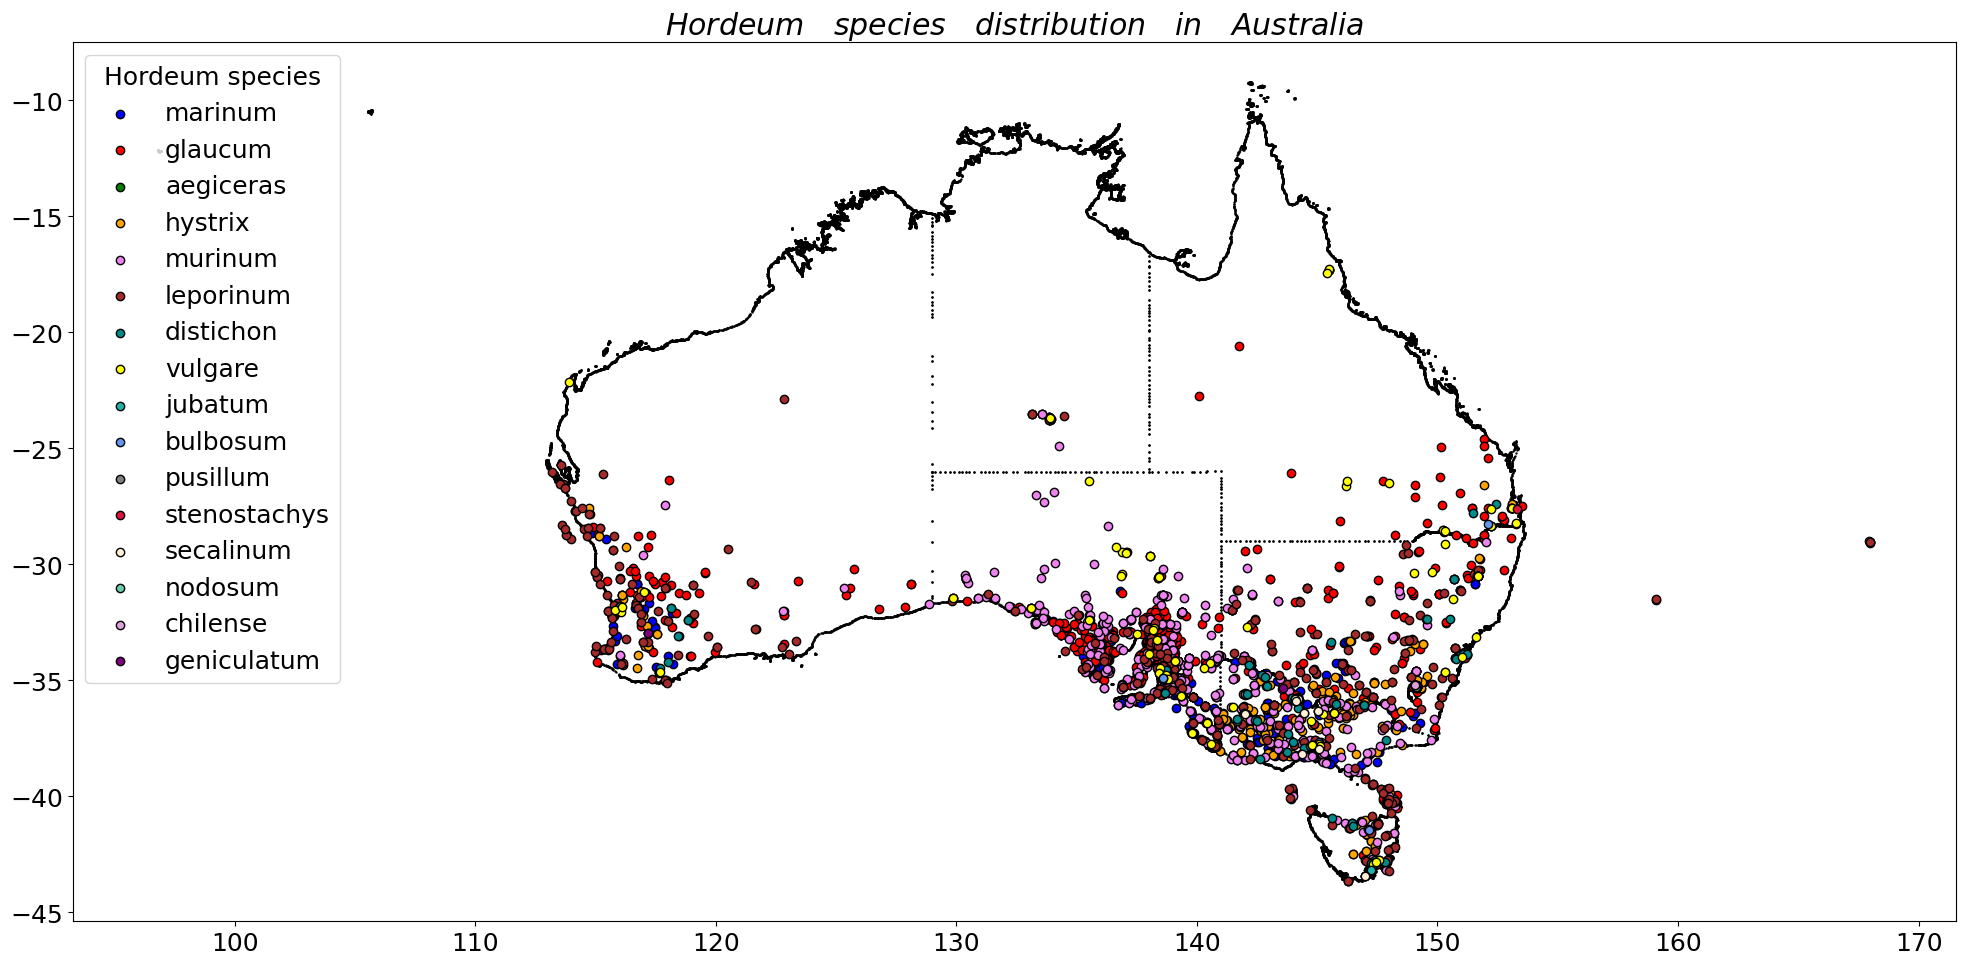

In [29]:
# DONE :)
plt.rcParams["font.size"] = 18
fig, axes = plt.subplots()
fig.set_size_inches(20, 10)
# draw the country, state and territory borders 

# for state_or_territory in ausgeo:
#     for coordinate_group in state_or_territory.get("geo_shape").get("geometry").get("coordinates"):
#         for coordinate in coordinate_group:
#             try:
#                 for (x, y) in coordinate:
#                     axes.plot(x, y, marker='o', color="black", markersize=0.5)
#             except TypeError:
#                 axes.plot(coordinate[0], coordinate[1], marker='o', color="black", markersize=0.5)

axes.scatter(COORDINATES_AUSTRALIA[:, 0], COORDINATES_AUSTRALIA[:, 1], s=0.5, color="black")

# plot the species                 
for species in hordeum_tidied.specificEpithet.unique():
    axes.scatter(x=hordeum_tidied.query(f"specificEpithet==\"{species}\"").decimalLongitude,
                 y=hordeum_tidied.query(f"specificEpithet==\"{species}\"").decimalLatitude,
                 color=hordeum_colour_lookup.get(species), label=species, edgecolor="black")#, alpha=0.5)

axes.legend(loc="upper left", title="Hordeum species")
axes.set_title(r"$Hordeum\hspace{1}species\hspace{1}distribution\hspace{1}in\hspace{1}Australia$")
plt.tight_layout()
# plt.savefig(fname="./hordeum-australia.jpeg", dpi=350)
plt.show()

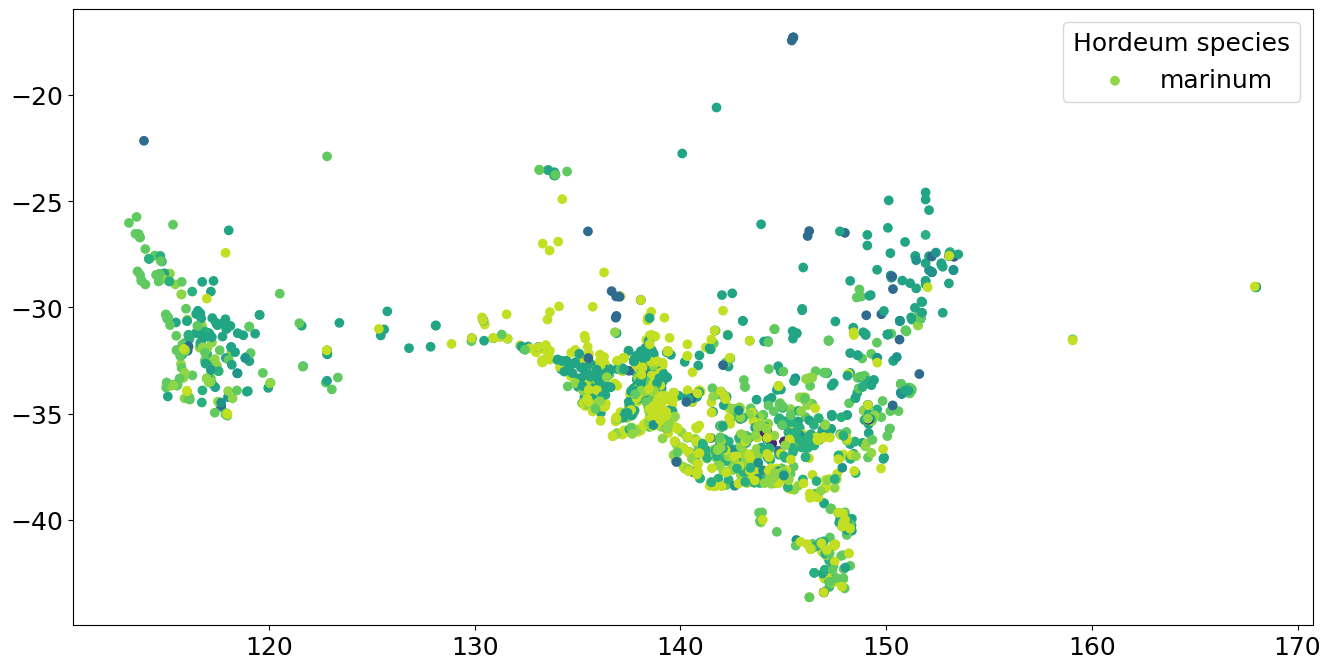

In [30]:
fig, axes = plt.subplots()
fig.set_size_inches(16, 8)
scatter = axes.scatter(hordeum_tidied.decimalLongitude, hordeum_tidied.decimalLatitude,
             c=np.square(hordeum_tidied.specificEpithet.astype("category").cat.codes.values),
                      label=hordeum_tidied.specificEpithet)
axes.legend(labels=hordeum_tidied.specificEpithet.unique(), loc="upper right", title="Hordeum species")
plt.show()

In [31]:
hordeum_tidied_nsw =  hordeum_australia.loc[:, ["country", "stateProvince", "day", "month", "year",
                         "genus", "specificEpithet", "decimalLatitude", "decimalLongitude"]].\
                            dropna(subset=["specificEpithet", "decimalLatitude", "decimalLongitude"]).\
                                query("decimalLatitude<-10 & specificEpithet!=\"sp.\" & stateProvince==\"New South Wales\"")

In [32]:
hordeum_tidied_nsw

,country,stateProvince,day,month,year,genus,specificEpithet,decimalLatitude,decimalLongitude
140,Australia,New South Wales,1.0,10.0,1934.0,Hordeum,leporinum,-33.781667,151.167778
141,Australia,New South Wales,15.0,11.0,1991.0,Hordeum,leporinum,-33.828767,151.064067
142,Australia,New South Wales,21.0,2.0,1947.0,Hordeum,leporinum,-35.715000,147.301111
143,Australia,New South Wales,16.0,11.0,1952.0,Hordeum,leporinum,-35.165000,146.084444
144,Australia,New South Wales,3.0,10.0,2004.0,Hordeum,leporinum,-33.916667,151.233333
...,...,...,...,...,...,...,...,...,...
2540,Australia,New South Wales,NaN,NaN,1870.0,Hordeum,murinum,-32.600000,149.566700
2594,Australia,New South Wales,NaN,10.0,1930.0,Hordeum,hystrix,-35.216700,146.716700
2603,Australia,New South Wales,NaN,NaN,NaN,Hordeum,murinum,-29.050000,152.016700
2644,Australia,New South Wales,10.0,10.0,1949.0,Hordeum,hystrix,-35.833300,145.633300


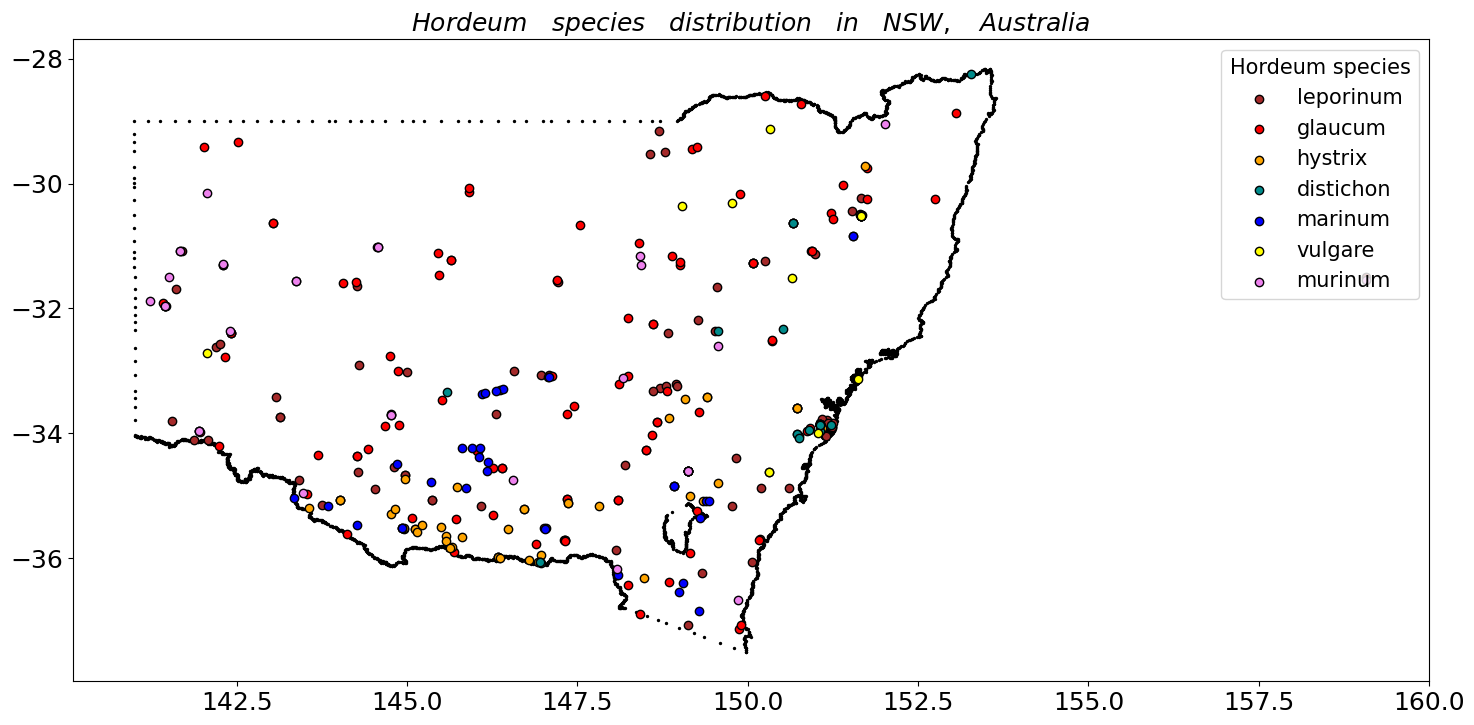

In [33]:
# JUST FOR NSW

fig, axes = plt.subplots()
fig.set_size_inches(15, 7.5)
plt.rcParams["font.size"] = 15
axes.set_title(r"$Hordeum\hspace{1}species\hspace{1}distribution\hspace{1}in\hspace{1}NSW,\hspace{1}Australia$")

# for coordinate_group in ausgeo[4].get("geo_shape").get("geometry").get("coordinates"):
#     for coordinate in coordinate_group:
#         try:
#             for (x, y) in coordinate:
#                 axes.plot(x, y, marker='o', color="black", markersize=2)
#         except TypeError:
#             axes.plot(coordinate[0], coordinate[1], marker='o', color="black", markersize=2)
axes.scatter(COORDINATES_NSW[:, 0], COORDINATES_NSW[:, 1], s=2, color="black")

# plot the species                 
for species in hordeum_tidied_nsw.specificEpithet.unique():
    axes.scatter(x=hordeum_tidied_nsw.query(f"specificEpithet==\"{species}\"").decimalLongitude,
                 y=hordeum_tidied_nsw.query(f"specificEpithet==\"{species}\"").decimalLatitude,
                 color=hordeum_colour_lookup.get(species), label=species, edgecolor="black")#, alpha=0.5)
axes.legend(loc="upper right", title="Hordeum species")

plt.tight_layout()
# plt.savefig(fname="./hordeum-nsw.jpeg", dpi=350)
plt.show()

In [62]:
[gc.collect(_) for _ in range(3)]

[0, 0, 0]

In [45]:
sorted(cyperus_tidied.specificEpithet.unique());

In [71]:
# Bruhl, J. and Wilson, K. (2007) ‘Towards a Comprehensive Survey of C3 and C4 Photosynthetic Pathways in Cyperaceae’, Aliso, 23(1), pp. 99–148. 
# Available at: https://doi.org/10.5642/aliso.20072301.11.

NSW_CYPERUS_PHOTOSYNTHETIC_PATHWAYS_LOOKUP_TABLE = {
 "aggregatus": "C4",
 "albostriatus": "C3",
 "alopecuroides": "C4",
 "alterniflorus": "C4",
 "aquatilis": "C3",
 # "areolatus": None,
 "betchei": "C4",
 "bifax": "C4",
 "bowmanni": "C4",
 "bowmannii": "C4", # PROBABLY A SPELLING MISTAKE!!
 # "bracheilema": None,
 # "brevibracteatus": None,
 # "brevifolia": None,
 # "brevifolius": None,
 # "brownii": None,
 # "bulbosus": None,
 "carinatus": "C4",
 "castaneus": "C4",
 "clarus": "C4",
 "compressus": "C4",
 "concinnus": "C3",
 "congestus": "C4",
 "conicus": "C4",
 # "curvistylis": None,
 "cyperoides": "C4",
 "dactylotes": "C4",
 # "debilis": None,
 "difformis": "C3",
 "digitatus": "C4",
 "disjunctus": "C3",
 "dubius": "C4",
 # "eglobosus": None,
 # "enervis": None,
 "eragrostis": "C3",
 "esculentus": "C4",
 "exaltatus": "C4",
 # "filipes": None,
 "flaccidus": "C3",
 # "flavescens": None,
 # "flavidus": None,
 "fulvus": "C4",
 "gilesii": "C4",
 "gracilis": "C3",
 "gunnii": "C4",
 "gymnocaulos": "C3",
 # "haematodes": None,
 "hamulosus": "C4",
 "haspan": "C3",
 # "imbecillis": None,
 "involucratus": "C3",
 "iria": "C4",
 "isabellinus": "C4",
 # "kyllingia": None,
 "laevigatus": "C4",
 "laevis": "C3",
 "leiocaulon": "C4",
 # "leptocarpus": None,
 # "lhotskyanus": None,
 "lucidus": "C4",
 "microcephala": "C4",
 # "mirus": None,
 # "nervulosus": None,
 "nutans": "C4",
 "odoratus": "C4",
 "papyrus": "C4",
 "pilosus": "C4",
 "platystylis": "C3",
 # "polystachyos": None,
 "procerus": "C4",
 "prolifer": "C3",
 "pulchellus": "C4+",
 "pygmaeus": "C4",
 "reflexus": "C3",
 "rigens": "C4",
 "rigidellus": "C4",
 "rotundus": "C4",
 # "rupicola": None,
 # "rupicolus": None,
 # "sanguinolentus": None,
 "scaber": "C4",
 # "sculptus": None,
 "secubans": "C4",
 # "semifertilis": None,
 # "sesquiflorus": None,
 # "sphaeroideus": None,
 "squarrosus": "C4",
 "stradbrokensis": "C3",
 # "subpinnatus": None,
 "subulatus": "C4",
 # "teneristolon": None,
 "tetracarpus": "C4",
 # "tetraphyllus": None,
 # "triceps": None,
 # "trinervis": None,
 # "unioloides": None,
 "vaginatus": "C3",
 "victoriensis": "C4",
 "vorsteri": "C4"
}

PHOTOSYNTHETIC_PATHWAY_MARKERS = {
    "C3": 'o',
    "C4": 's',
    "C4+": 'D',
}

In [79]:
# Cyperus
cyperus_tidied = cyperus_australia.loc[:, ["country", "stateProvince", "day", "month", "year",
                         "genus", "specificEpithet", "decimalLatitude", "decimalLongitude"]].\
                            dropna(subset=["specificEpithet", "decimalLatitude", "decimalLongitude"]).\
                            query("stateProvince==\"New South Wales\"")

cyperus_tidied = cyperus_tidied.loc[cyperus_tidied.specificEpithet.\
                    isin(NSW_CYPERUS_PHOTOSYNTHETIC_PATHWAYS_LOOKUP_TABLE.keys()), :]
cyperus_tidied.loc[:, "photosyntheticPathway"] = cyperus_tidied.specificEpithet.\
                    apply(lambda _: NSW_CYPERUS_PHOTOSYNTHETIC_PATHWAYS_LOOKUP_TABLE.get(_))

In [80]:
# that's a lot better than the whole australia
cyperus_tidied.specificEpithet.unique().size

63

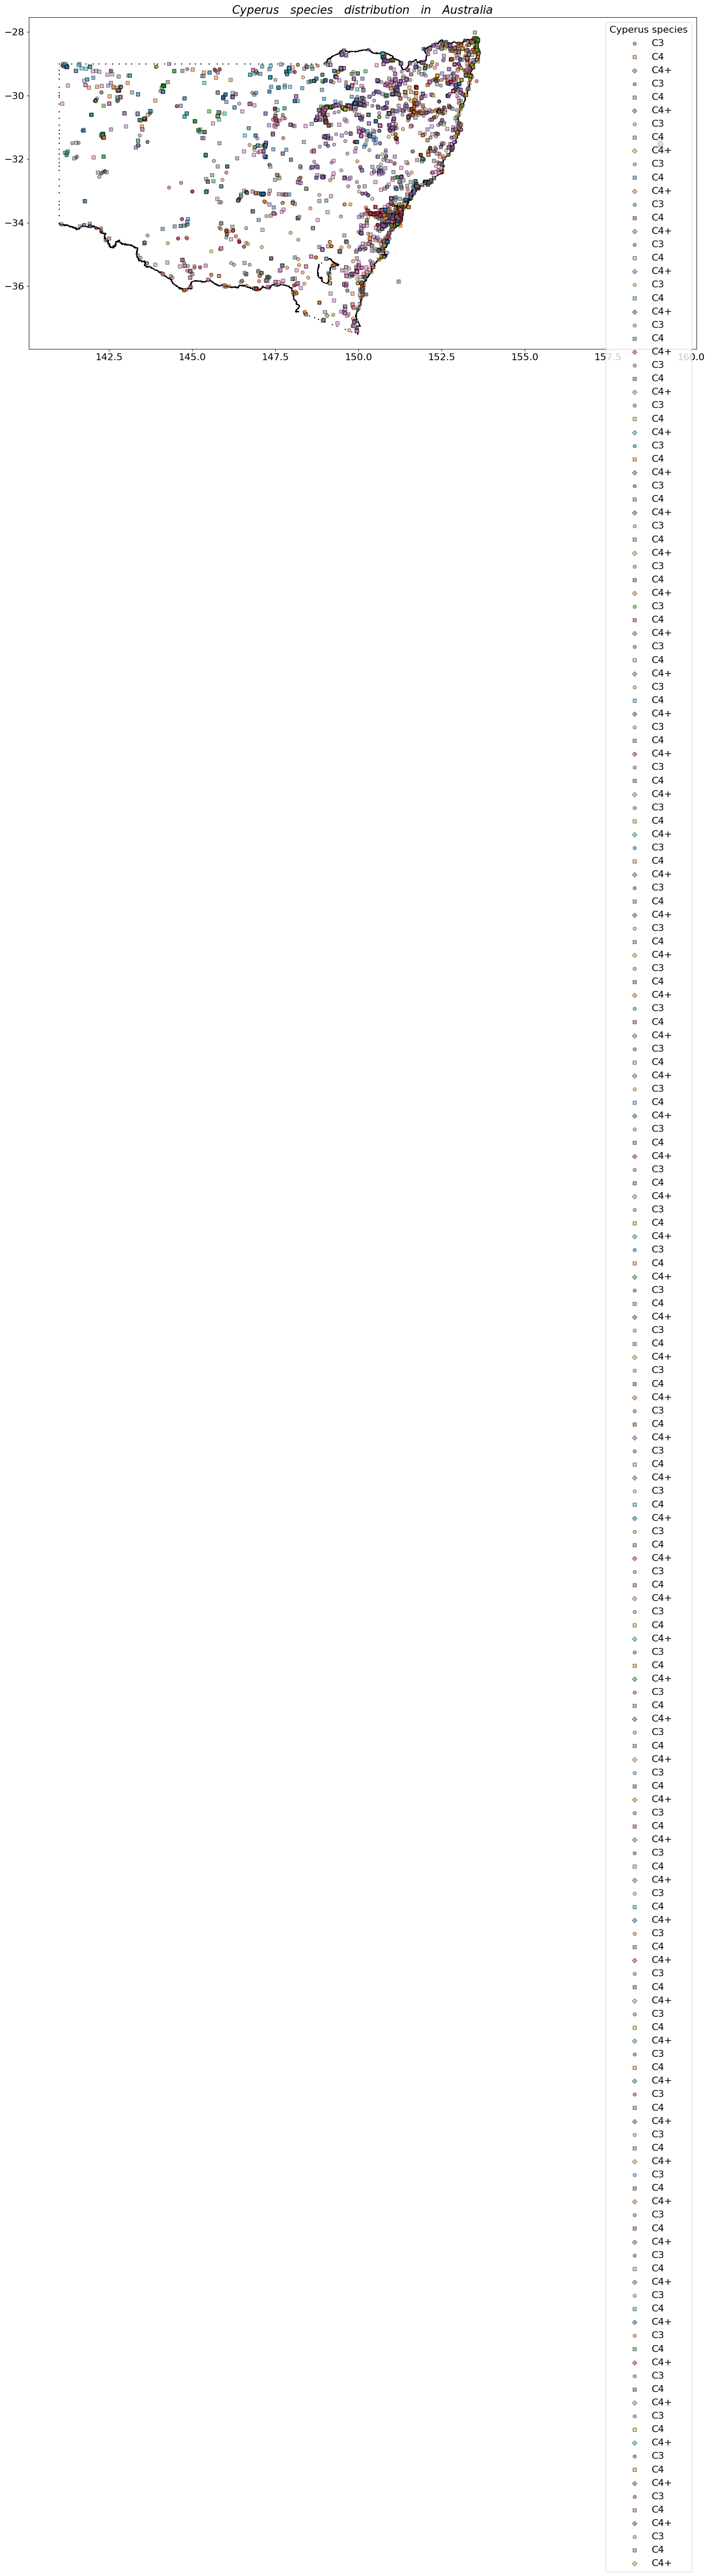

In [81]:
plt.rcParams["font.size"] = 16
fig, axes = plt.subplots()
fig.set_size_inches(20, 10)

axes.scatter(COORDINATES_NSW[:, 0], COORDINATES_NSW[:, 1], s=1, color="black")
for species in cyperus_tidied.specificEpithet.unique():
    for pway in PHOTOSYNTHETIC_PATHWAY_MARKERS.keys():
        axes.scatter(
            x=cyperus_tidied.query(f"specificEpithet==\"{species}\" & photosyntheticPathway==\"{pway}\"").decimalLongitude,
            y=cyperus_tidied.query(f"specificEpithet==\"{species}\" & photosyntheticPathway==\"{pway}\"").decimalLatitude,
            edgecolor="black", alpha=0.5, s=30, label=pway,
            marker=PHOTOSYNTHETIC_PATHWAY_MARKERS.get(pway)
        )

axes.legend(loc="best", title="Cyperus species")
axes.set_title(r"$Cyperus\hspace{1}species\hspace{1}distribution\hspace{1}in\hspace{1}Australia$")
# plt.tight_layout()
# plt.savefig(fname="./cyperus-australia.jpeg", dpi=350)
plt.show()